In [25]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rossana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
from nltk import word_tokenize

In [29]:
token = word_tokenize(u'Bonjour tout le monde , il fait beau aujourdui nous allons sortir cet aprem')
token
# Ou une phase en Anglais

['Bonjour',
 'tout',
 'le',
 'monde',
 ',',
 'il',
 'fait',
 'beau',
 'aujourdui',
 'nous',
 'allons',
 'sortir',
 'cet',
 'aprem']

In [30]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rossana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/rossana/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/rossana/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [31]:
from nltk import word_tokenize , pos_tag , ne_chunk
# pos_tag : permet de reconnaitre les lieux et ne_chunk des personnes

In [32]:
token = word_tokenize(u'John works at Linkedin in Paris in France')
print(ne_chunk(pos_tag(token)))

# GPE : lieu

(S
  (PERSON John/NNP)
  works/VBZ
  at/IN
  (ORGANIZATION Linkedin/NNP)
  in/IN
  (GPE Paris/NNP)
  in/IN
  (GPE France/NNP))


In [33]:
#Exemple :
from nltk.stem.porter import PorterStemmer # PorterStemmer est lematiseur
ps = PorterStemmer()
# ps : cette variable contient toutes les librairies d'analyse necessaires

print(ps.stem("saying")) # say
print(ps.stem("échappées")) # échappé : ramener au masculin
print(ps.stem("échappée"))

say
échappé
échappé


In [34]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('french')
snow.stem('navigatrice') # navig on a la racine navig

'navig'

In [35]:
import spacy

In [36]:
spacy.load('en_core_web_sm')
spacy.load('fr_core_news_sm')

In [37]:
nlp = spacy.load('en_core_web_sm')

doc = nlp(u'John works at Linkedin in Paris in France. He is very happy to work their')
doc

John works at Linkedin in Paris in France. He is very happy to work their

In [38]:
doc.ents # On obtients les éléments clés

(John, Linkedin, Paris, France)

In [39]:
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')
for token in doc:
    print(token.text , token.lemma_)

Apple Apple
is be
looking look
at at
buying buy
U.K. U.K.
startup startup
for for
$ $
1 1
billion billion


In [40]:
nlp = spacy.load('fr_core_news_sm')
doc = nlp(u"Cette entreprise a été achetée 1 millions d'euros ")

for token in doc:
    print(token.text , token.pos_)

Cette DET
entreprise NOUN
a AUX
été AUX
achetée VERB
1 NUM
millions NOUN
d' ADP
euros NOUN


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Création d'un sac vide
vectorizer = CountVectorizer()
print(vectorizer)
print('--------------')

CountVectorizer()
--------------


In [46]:
# Création d'un corpus
corpus = ['un jour ici et là', 'demain mais pas ici', 'la la la lere']
print(corpus)
print('--------------')

['un jour ici et là', 'demain mais pas ici', 'la la la lere']
--------------


In [47]:
# Calcul du sac
vectorizer.fit(corpus)
bow = vectorizer.transform(corpus)
print(bow)
print('--------------')

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 6)	1
  (0, 9)	1
  (1, 0)	1
  (1, 2)	1
  (1, 7)	1
  (1, 8)	1
  (2, 4)	3
  (2, 5)	1
--------------


In [48]:
feature_names = vectorizer.get_feature_names_out() # Utilisation de get_feature_names_out()
print(feature_names)

['demain' 'et' 'ici' 'jour' 'la' 'lere' 'là' 'mais' 'pas' 'un']


In [49]:
# Binairisation

bow.toarray() # presence ou absece d'un mot dans un document

array([[0, 1, 1, 1, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 3, 1, 0, 0, 0, 0]])

In [50]:
# Binairisation en format pandas

# Convertir bow en array et utiliser get_feature_names_out() pour les noms de colonnes
df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
print(df)

   demain  et  ici  jour  la  lere  là  mais  pas  un
0       0   1    1     1   0     0   1     0    0   1
1       1   0    1     0   0     0   0     1    1   0
2       0   0    0     0   3     1   0     0    0   0


In [51]:
from sklearn.feature_extraction.text import CountVectorizer # compter
from sklearn.feature_extraction.text import TfidfTransformer # poids

corpus = ['un jour ici et là ' , 'demain mais pas la la la ici' , 'la la la la la la lere']

vectorizer = CountVectorizer()

# comptage
counts = vectorizer.fit_transform(corpus)
counts

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [52]:
# calcul TFIDF à partir du comptage
transformer = TfidfTransformer()
transformer.fit_transform(counts)
# IFIDF diminue la ponderatin des presents dans plusieurs documents.
# Exemple les mots "ici" & "la"

transformer.idf_ # les poids
# len(transformer.idf_)

array([1.69314718, 1.69314718, 1.28768207, 1.69314718, 1.28768207,
       1.69314718, 1.69314718, 1.69314718, 1.69314718, 1.69314718])

In [53]:
# Création du dictionnaire à partir des noms des caractéristiques et des scores IDF
dic = dict(zip(vectorizer.get_feature_names_out(), transformer.idf_))

# Création du DataFrame à partir du dictionnaire
df = pd.DataFrame.from_dict(dic, orient="index", columns=['IDF'])
print(df)

             IDF
demain  1.693147
et      1.693147
ici     1.287682
jour    1.693147
la      1.287682
lere    1.693147
là      1.693147
mais    1.693147
pas     1.693147
un      1.693147


In [55]:
from wordcloud import WordCloud

In [56]:
all_text = ' '.join(corpus)
all_text

'un jour ici et là  demain mais pas la la la ici la la la la la la lere'

In [57]:
wordcloud = WordCloud(width = 800, height = 800,
background_color ='white',
min_font_size = 10).generate(all_text)

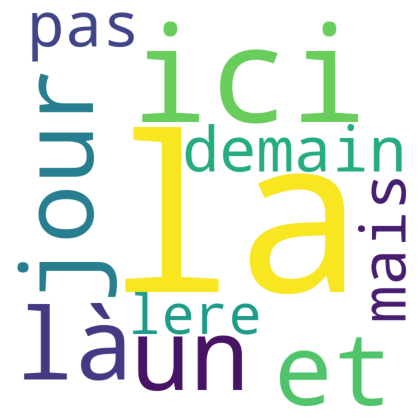

In [58]:
# Afficher le nuage de mots
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [59]:
from nltk.probability import FreqDist

In [60]:
import nltk

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/rossana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
tokens = nltk.word_tokenize(all_text)

# Calcul de la fréquence des mots
fdist = FreqDist(tokens)

# Préparation des données pour le graphique
words = [word for word, freq in fdist.most_common(20)]
print(words)
print("------------------")

['la', 'ici', 'un', 'jour', 'et', 'là', 'demain', 'mais', 'pas', 'lere']
------------------
